### Optimization and Evaluation of a Deep Learning Model (Neural Network)  for Classification

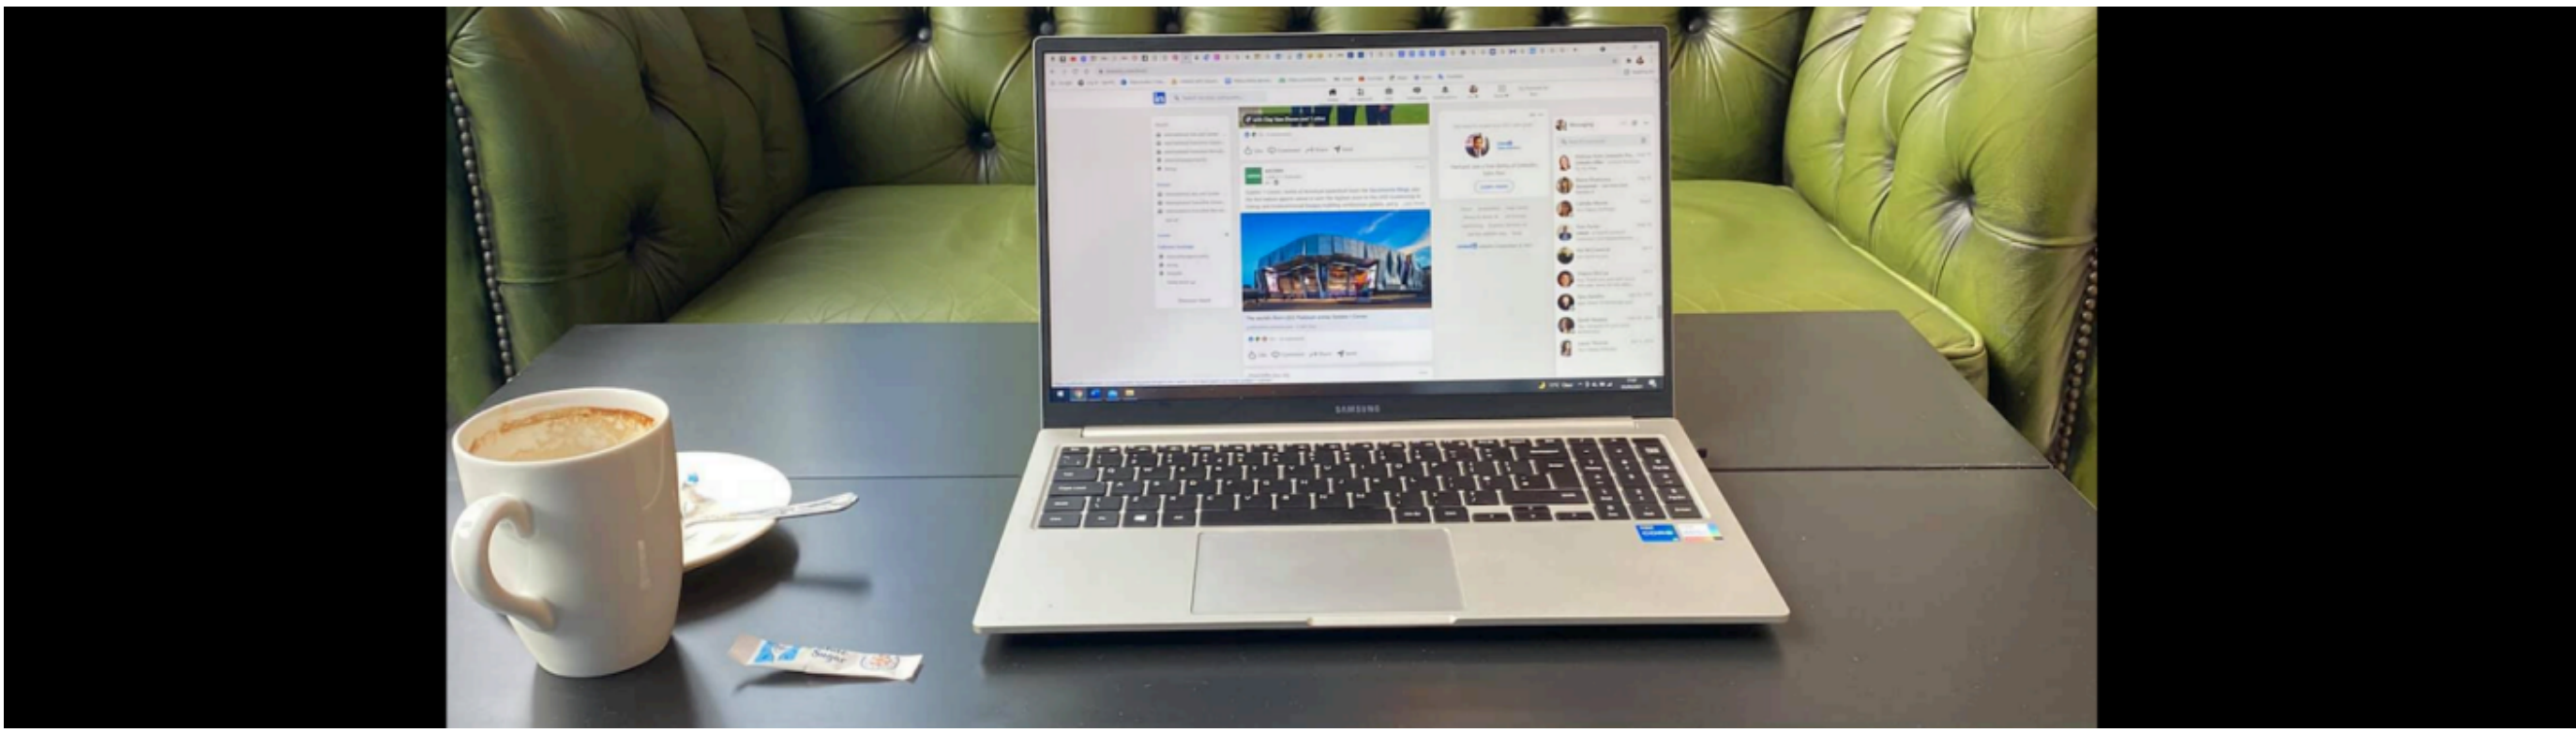

### HEMANT THAPA

## LIBRARIES 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import statistics as st
import yfinance as yf
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#### What is classification ? 

A Machine Learning Techiques to identify the category of new obesrvation base on trained data.

Classification is a supervised machine learning method where the model tries to predict the correct label of a given input data. In classification, the model is fully trained using the training data, and then it is evaluated on test data before being used to perform prediction on new unseen data.

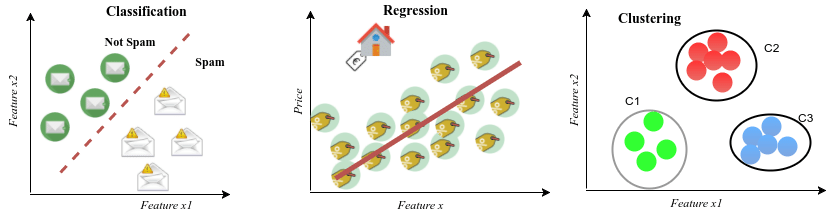

#### Predict a categorical dependent varibles from a number of independent variables. 

Predicting the class or category of a case is a fundamental task in machine learning and artificial intelligence. It involves determining which group or category a particular instance belongs to based on its features or attributes. The goal is to build a model that can automatically assign cases to their respective classes with a certain level of accuracy.

#### There are two main types of classification problems, based on the number of classes involved:

Simple Classification / Binary Classification:
In this type of problem, there are only two possible classes or categories that an instance can belong to. It's essentially a yes-no or true-false type of prediction. For instance, you might be predicting whether an email is spam (class 1) or not spam (class 0), whether a customer will buy a product (class 1) or not buy (class 0), and so on.

Multi-Class Classification:
In this type of problem, there are more than two possible classes or categories that an instance can belong to. The task is to assign the correct label among several options. For example, you might predict the genre of a movie from categories like action, comedy, drama, science fiction, etc. Another example is classifying different types of animals, like cats, dogs, and birds.

## CREATING DATASET

In [3]:
#loading dataset
df = pd.read_csv('car_data.csv')

In [4]:
df[:5]

User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0

In [5]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
#checking shape of dataset, rows x columns
df.shape

(1000, 5)

In [7]:
#checking missing values
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

## FEATURE AND TARGET VARIABLE SELECTION

1. Features (Independent Variables): Features are the input variables or attributes that are used to describe the data and provide information to a machine learning algorithm. They are the characteristics or properties of the data points that the model uses to make predictions or classifications. For example, in a housing price prediction model, features could include variables like the number of bedrooms, square footage, location, and so on.

2. Target (Dependent Variable): The target variable, also known as the dependent variable, is the variable that you want the machine learning model to predict or classify. It is the output you are trying to estimate or analyze based on the input features. Using the housing price prediction example, the target variable would be the actual sale price of the house. The model learns to make predictions or classifications based on the patterns it identifies between the features and the target variable.






In [8]:
#Checking index for selecting features
for i,j in enumerate(df.columns):
    print(f'Index {i} : {j}')

Index 0 : User ID
Index 1 : Gender
Index 2 : Age
Index 3 : AnnualSalary
Index 4 : Purchased


In [9]:
#Selecting features columns
features_columns = df.columns[2:4]
features_columns

Index(['Age', 'AnnualSalary'], dtype='object')

In [10]:
#Selecting features
X = df[features_columns]
X[:5]

Age  AnnualSalary
0   35         20000
1   40         43500
2   49         74000
3   40        107500
4   25         79000

In [11]:
#Checking shape of feature columns
X.shape

(1000, 2)

In [12]:
df[:5]

User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0

In [13]:
#Selecting target
y = df['Purchased'].values

In [14]:
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [15]:
print(f'Dimension of Features: {X.ndim}D')
print(f'Dimension of Target: {y.ndim}D')

Dimension of Features: 2D
Dimension of Target: 1D


## SPLITING DATA FOR TRAINING AND TESTING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Splitting dataset for training and testing
#80 percent training 
#20 percent testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

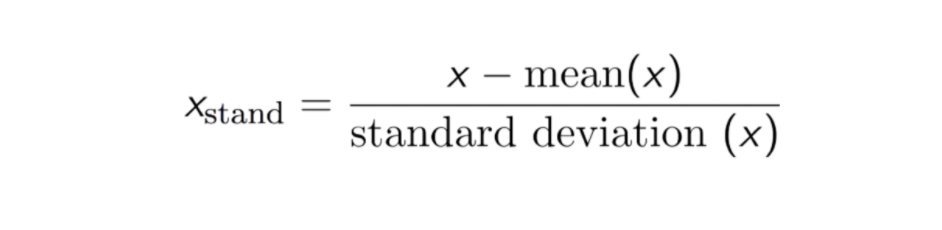

In [18]:
#StandardScaler
scaler = StandardScaler()

In [19]:
# Scaling the training data using the fitted scaler and transform the test data using the same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled[:5]

array([[-1.33361157,  0.32134116],
       [-0.02339669, -0.45583598],
       [-0.67850413, -1.53524866],
       [-0.77209091, -0.38387513],
       [-0.30415702, -0.55658116]])

In [21]:
X_test_scaled[:5]

array([[ 1.28681818,  1.83251891],
       [ 0.07019008, -0.15360042],
       [ 0.91247107, -1.24740528],
       [-1.89513223,  0.37890983],
       [-1.24002479, -1.1898366 ]])

In [22]:
#Checking shape of train model
print(X_train.shape)
print(y_train.shape)

(800, 2)
(800,)


In [23]:
#Checking the shape of test model
print(X_test.shape)
print(y_test.shape)

(200, 2)
(200,)


## TRAINING MODEL

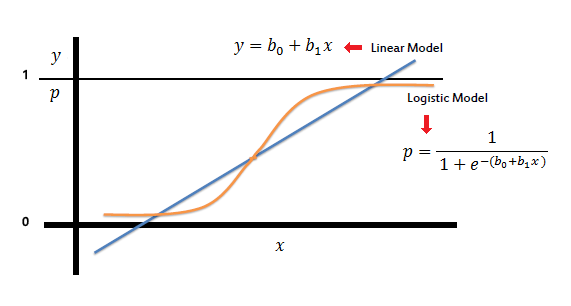

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

The `LogisticRegression` class in scikit-learn is a versatile implementation of logistic regression for classification tasks. It inherits from several base classes, including `LinearClassifierMixin`, `SparseCoefMixin`, and `BaseEstimator`.

Parameters:
- `penalty` (default: 'l2'): The penalty term to be applied in the logistic regression. It can take values 'l1', 'l2', 'elasticnet', or 'none'.
- `dual` (default: False): Indicates whether to solve the dual optimization problem. It's usually set to False unless the number of samples is smaller than the number of features.
- `tol` (default: 0.0001): Tolerance for stopping criteria.
- `C` (default: 1.0): Inverse of regularization strength; smaller values specify stronger regularization.
- `fit_intercept` (default: True): Specifies whether to fit an intercept term to the model.
- `intercept_scaling` (default: 1): Scales the intercept term.
- `class_weight` (default: None): Weights associated with classes, useful for imbalanced datasets.
- `random_state` (default: None): Seed for the random number generator.
- `solver` (default: 'lbfgs'): Algorithm to use for optimization. Options include 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'.
- `max_iter` (default: 100): Maximum number of iterations to converge.
- `multi_class` (default: 'auto'): Determines the strategy for handling multiple classes. Options include 'ovr' (one-vs-rest) or 'multinomial'.
- `verbose` (default: 0): Controls the verbosity of the solver.
- `warm_start` (default: False): Allows reusing the previous solution to accelerate fitting when set to True.
- `n_jobs` (default: None): Number of CPU cores to use when parallelizing the computation. Useful for large datasets.
- `l1_ratio` (default: None): The mixing parameter for 'elasticnet' penalty. If None, the penalty is l2.


In [25]:
#the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial', 'auto']
}

In [26]:
#Logistic Regression model
model = LogisticRegression()

In [27]:
#GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)

In [28]:
#grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'multi_class': ['ovr', 'multinomial', 'auto'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [29]:
#best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [30]:
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimator: LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', solver='liblinear')


In [31]:
#best estimator to make predictions
y_pred = best_estimator.predict(X_test_scaled)

In [32]:
#checking length or total data points
len(y_pred)

200

In [33]:
#prediction
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

#### MODEL EVALUATION 

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score 

In [35]:
#Accracy of model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


##### CONFUSION MATRIX

In [36]:
cm = confusion_matrix(y_test, y_pred)

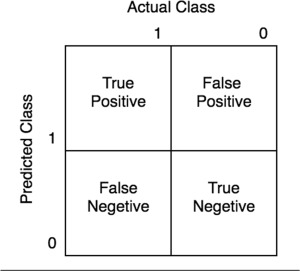

In [37]:
cm

array([[112,   9],
       [ 15,  64]], dtype=int64)

True Positive (TP) : 112

True Negative (TF) : 64

False Positive (FP) : 9

False Negative (FN) : 15

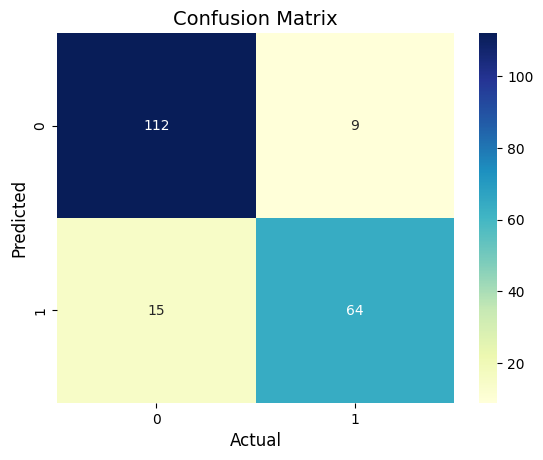

In [38]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Actual", fontsize=12)  
plt.ylabel("Predicted", fontsize=12)  
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [39]:
# Indexing each value for analysis
TP = cm[0, 0]  # True Positives: Actual 0, Predicted 0
TN = cm[1, 1]  # True Negatives: Actual 1, Predicted 1
FP = cm[0, 1]  # False Positives: Actual 0, Predicted 1
FN = cm[1, 0]  # False Negatives: Actual 1, Predicted 0

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       121
           1       0.88      0.81      0.84        79

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



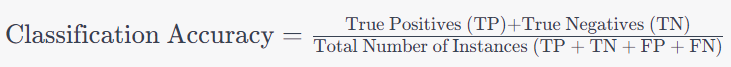

In [41]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(f'Classification accuracy : {round((classification_accuracy),4)}')

Classification accuracy : 0.88


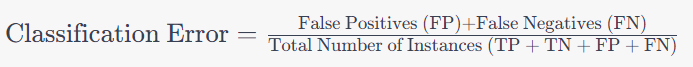

In [42]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(f'Classification Error : {round((classification_error),4)}')

Classification Error : 0.12


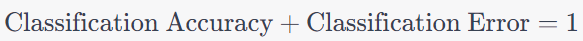

In [43]:
classification_accuracy + classification_error

1.0

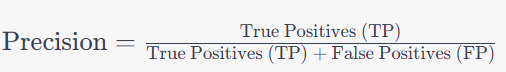

In [44]:
precision = TP / float(TP + FP)

In [45]:
print(f'Precision : {round(precision,4)}')

Precision : 0.9256


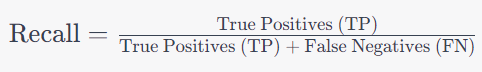

In [46]:
recall = TP / float(TP + FN)

In [47]:
print(f'Recall : {round((recall),4)}')

Recall : 0.8819


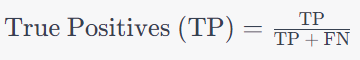

In [48]:
true_positive = TP / float(TP + FN)
print(f'True Positive: {round((true_positive),4)}')

True Positive: 0.8819


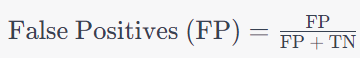

In [49]:
false_positive = FP / float(FP + TN)
print(f'False Positive : {round(false_positive,4)}')

False Positive : 0.1233


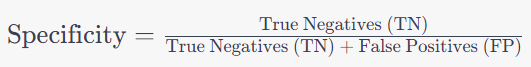

In [50]:
specificity = TN / (TN + FP)
print(f'Specificity : {round(specificity, 4)}')

Specificity : 0.8767


In [51]:
from sklearn.metrics import roc_curve, auc

AREA UNDER THE ROC CURVE

In [52]:
# Use the best estimator to make predictions on the test data
y_pred_proba = best_estimator.predict_proba(X_test_scaled)[:, 1]

In [53]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [54]:
#AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

In [55]:
print(f'Roc AUC : {roc_auc:.4f}')

Roc AUC : 0.9448


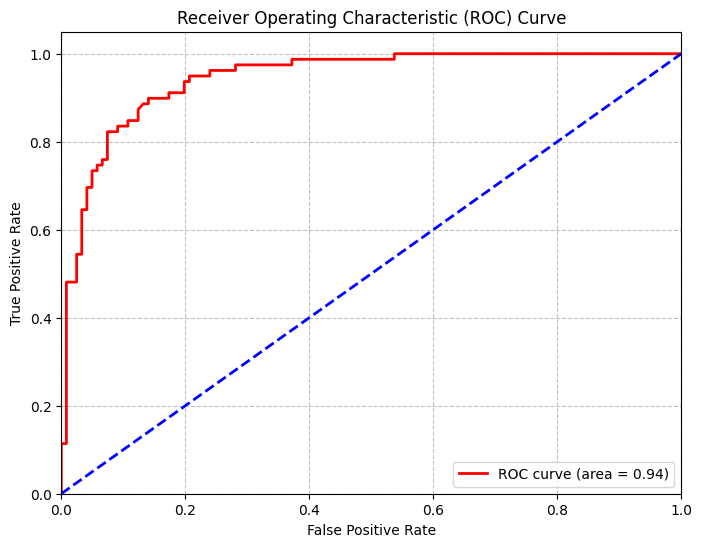

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

#### DECISION BOUNDARY

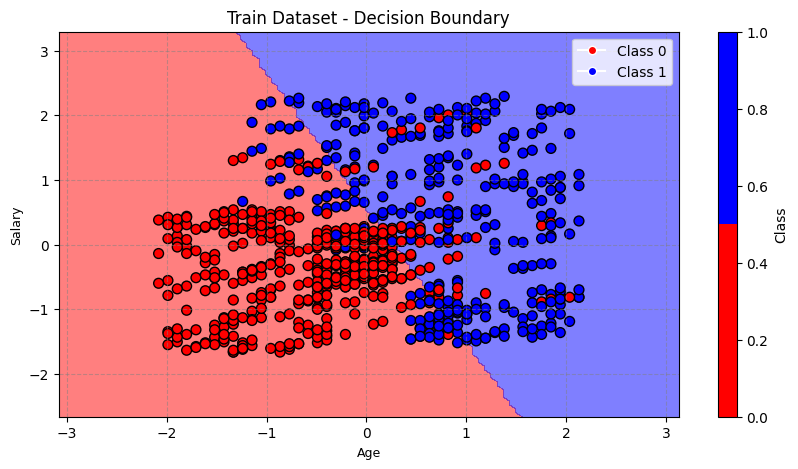

In [57]:
#mesh grid for the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the class for each point in the mesh grid using the best estimator
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'red','blue'])
#decision boundary and training data
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=cmap_custom, alpha=0.5)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_custom, marker='o', edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Train Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=6, label='Class 1')])
plt.show()

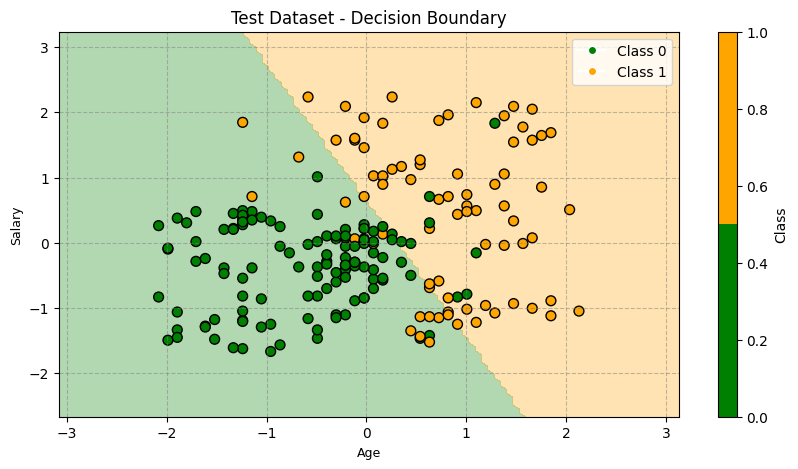

In [58]:
#mesh grid for the decision boundary
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the class for each point in the mesh grid using the best estimator
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'green','orange'])
# Plot the decision boundary and test data
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, levels=1, cmap=cmap_custom, alpha=0.3)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Test Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=6, label='Class 1')])
plt.show()

## NEURAL NETWORK

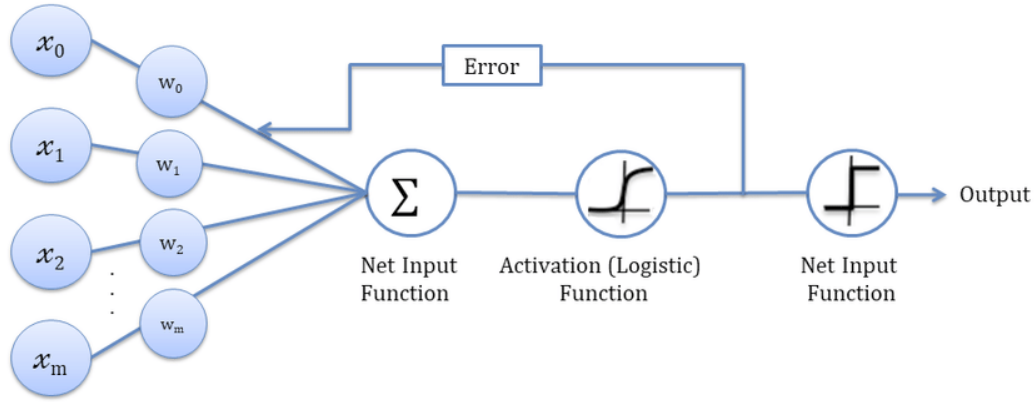

In [59]:
#Selecting features columns
features_columns = df.columns[2:4]
features_columns

Index(['Age', 'AnnualSalary'], dtype='object')

In [60]:

#Selecting features
X = df[features_columns]
X[:5]

Age  AnnualSalary
0   35         20000
1   40         43500
2   49         74000
3   40        107500
4   25         79000

In [61]:
y = df['Purchased'].values
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Hidden Layer Calculation:
The hidden layer has a weight matrix W₁ and a bias vector b₁. The output of the hidden layer can be calculated using the rectified linear unit (ReLU) activation function:

z₁ = W₁ ⋅ X + b₁
a₁ = ReLU(z₁)

#### Output Layer Calculation:
The output layer has a weight matrix W₂ and a bias vector b₂. The output of the output layer is calculated using the sigmoid activation function for binary classification:

z₂ = W₂ ⋅ a₁ + b₂
ŷ = σ(z₂)

#### Where:
X is the input data point with features x₁ and x₂.
z₁ is the pre-activation value of the hidden layer.
a₁ is the output of the hidden layer after applying the ReLU activation function.
W₁ is the weight matrix of the hidden layer.
b₁ is the bias vector of the hidden layer.
z₂ is the pre-activation value of the output layer.
ŷ is the predicted output of the neural network.
W₂ is the weight matrix of the output layer.
b₂ is the bias vector of the output layer.
σ(z) is the sigmoid activation function.


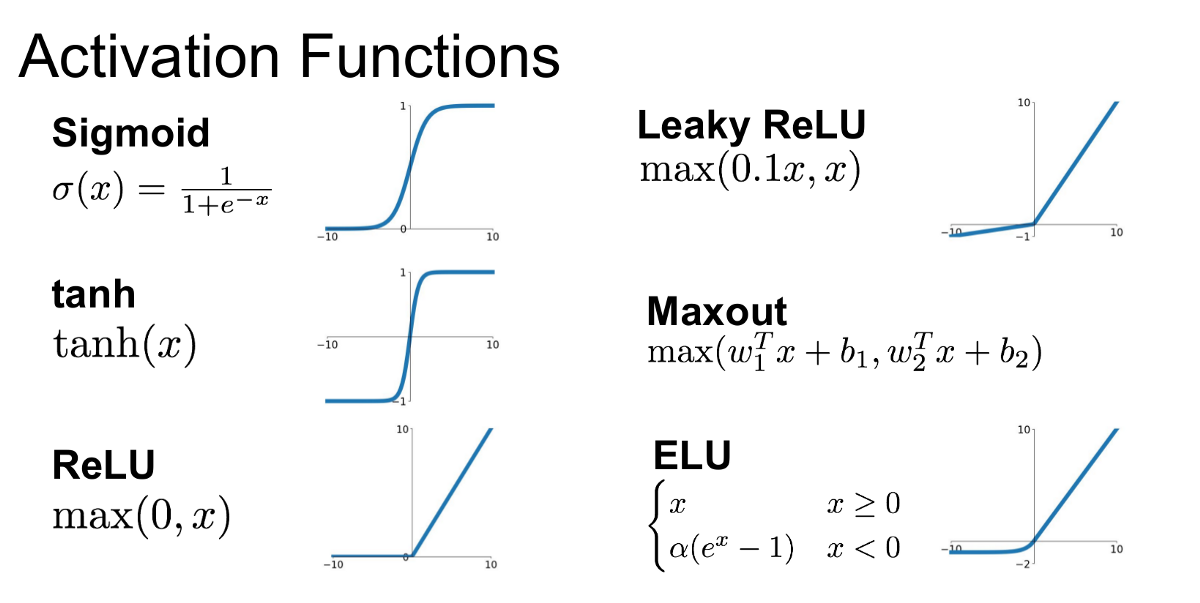

#### The ReLU (Rectified Linear Unit) is a widely used activation function in neural networks that introduces non-linearity to the network. It operates as follows:

1. Calculation of z₁:
   In a neural network's hidden layer, each neuron receives input from the previous layer's neurons. The input is a linear combination of the input data (X) and associated weights (W₁), plus a bias term (b₁):
   
   z₁ = W₁ ⋅ X + b₁
   
2. Application of ReLU Activation:
   The ReLU activation function is applied element-wise to the pre-activation values (z₁). It is defined as:
   
   ReLU(x) = max(0, x)
   
   For each element in the pre-activation vector, ReLU outputs the element itself if positive, and 0 if negative:
   
   a₁ = ReLU(z₁) = max(0, z₁)
   
ReLU introduces non-linearity by preserving positive values and setting negatives to 0. This non-linearity is crucial for the network to learn complex data patterns.

ReLU enhances neural networks by applying the max(0, x) function to pre-activation values, enabling the network to capture intricate relationships in the data.


In [64]:
# Build a simple deep learning model using TensorFlow and Keras
model = tf.keras.Sequential([
    # Input layer with shape (2,)
    tf.keras.layers.Input(shape=(2,)),
     # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
     # Output layer with 1 unit and sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [65]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.7020 - accuracy: 0.6000 - val_loss: 0.6051 - val_accuracy: 0.8300
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8213 - val_loss: 0.4802 - val_accuracy: 0.8700
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8562 - val_loss: 0.3956 - val_accuracy: 0.8850
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8625 - val_loss: 0.3416 - val_accuracy: 0.9000
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8612 - val_loss: 0.3098 - val_accuracy: 0.9050
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8700 - val_loss: 0.2876 - val_accuracy: 0.9100
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8737 - val_loss: 0.2729 - val_accuracy: 0.9150
Epoch 8/100
5

The provided output indicates that the model is training and evaluating successfully. The training accuracy is increasing over epochs, and the validation accuracy is also high, indicating that the model is performing well.

The training loss is decreasing over epochs, which is a positive sign, indicating that the model is learning from the data. Similarly, the validation loss is decreasing, which indicates that the model is not overfitting.

The final accuracy on the validation (test) set is 100%, which indicates that the model is performing very well on the provided data. However, achieving 100% accuracy on real-world data is uncommon and could indicate that the dataset is very small or simple.

In [67]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) >= 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2%}")

7/7 [==============================] - 0s 1ms/step
Test Accuracy: 91.00%


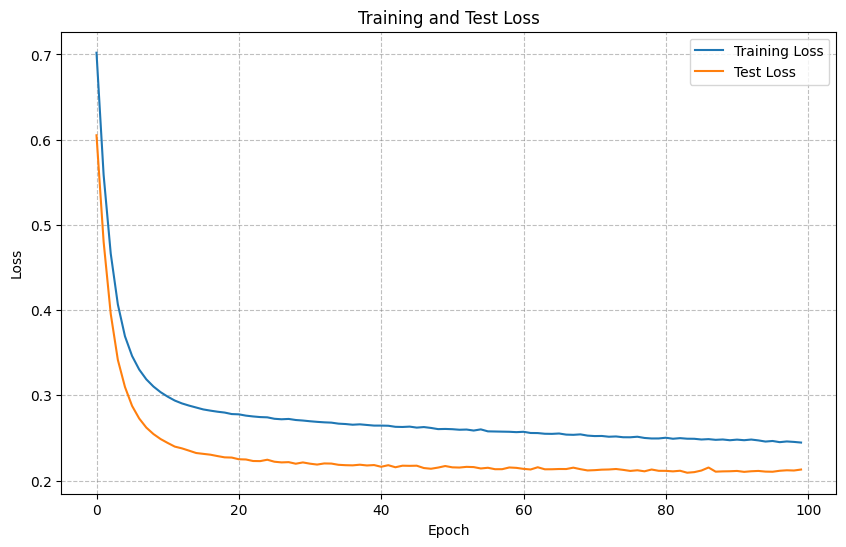

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

11488/11488 [==============================] - 9s 791us/step


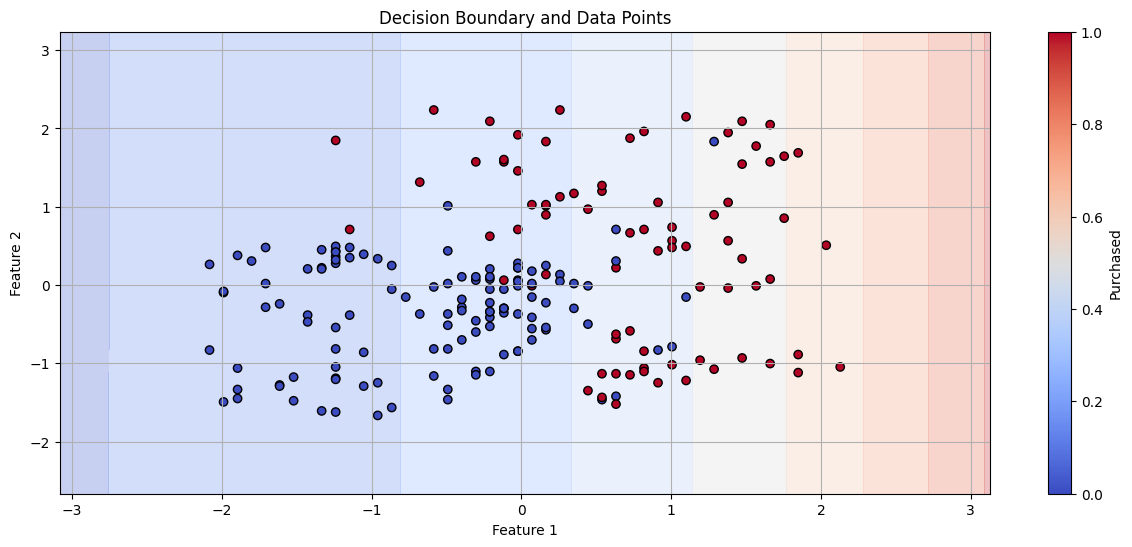

In [69]:
# Plot decision boundary
plt.figure(figsize=(15, 6))
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(scaler.transform(grid_points)).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3)

# Color the data points based on true labels
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap="coolwarm", marker="o", edgecolors='k')
plt.colorbar(label="Purchased")

plt.title("Decision Boundary and Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## OPTIMISATION 

In [70]:
#Selecting features columns
features_columns = df.columns[2:4]
features_columns

Index(['Age', 'AnnualSalary'], dtype='object')

In [71]:
#Selecting features
X = df[features_columns]
X[:5]

Age  AnnualSalary
0   35         20000
1   40         43500
2   49         74000
3   40        107500
4   25         79000

In [72]:
y = df['Purchased'].values
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [73]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=False)

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [75]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [76]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

In [78]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

Epoch 1/100
25/25 [==============================] - 2s 11ms/step - loss: 0.9276 - accuracy: 0.7987 - val_loss: 0.9960 - val_accuracy: 0.9214
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7832 - accuracy: 0.8675 - val_loss: 0.9098 - val_accuracy: 0.9286
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7347 - accuracy: 0.8863 - val_loss: 0.8531 - val_accuracy: 0.9357
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.8900 - val_loss: 0.8066 - val_accuracy: 0.9357
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.8913 - val_loss: 0.7553 - val_accuracy: 0.9071
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.8925 - val_loss: 0.7164 - val_accuracy: 0.9071
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.8988 - val_loss: 0.6907 - val_accuracy: 0.9071
Epoch 8/100


In [79]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 [==============================] - 0s 2ms/step
Test Accuracy: 88.33%


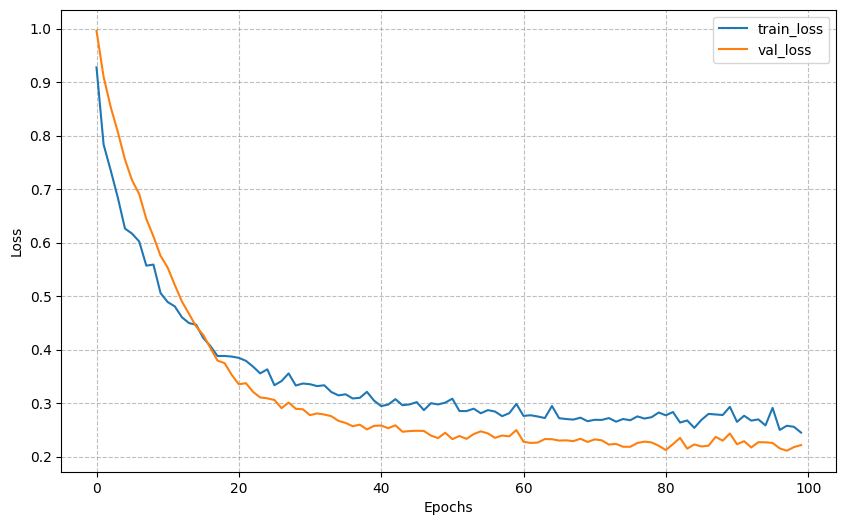

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

11585/11585 [==============================] - 14s 1ms/step


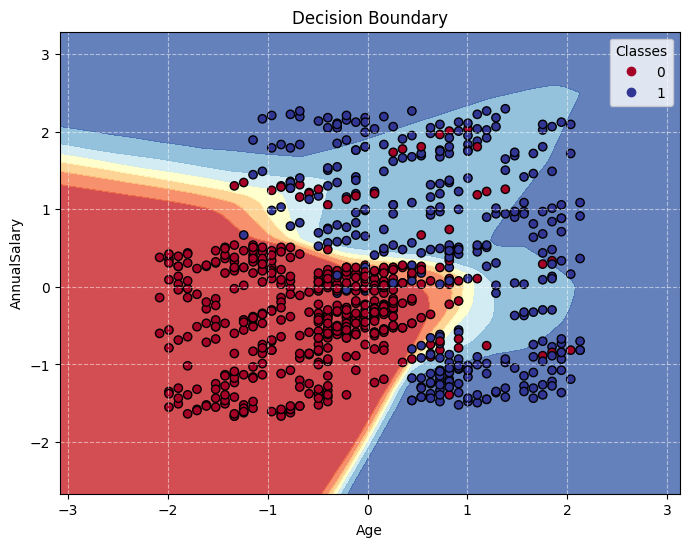

In [91]:
# Generate a grid of points that covers the feature space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#predictions on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model.predict(grid_points).reshape(xx.shape)

#contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.xlabel(features_columns[0])
plt.ylabel(features_columns[1])
plt.title("Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='white')

# Scatter plot for actual "Purchased" data
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.show()

## REFERENCES

1. **Logistic Regression Example using scikit-learn**
   - Title: [Logistic Regression 3-class Classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)

2. **Feedforward Neural Networks Introduction**
   - Title: [Introduction to Feedforward Deep Neural Networks](http://uc-r.github.io/feedforward_DNN)

3. **Comparison of Feed-Forward and Feedback Neural Networks**
   - Title: [Feed-Forward vs. Feedback Neural Networks: A Comparative Analysis](https://blog.paperspace.com/feed-forward-vs-feedback-neural-networks/)

4. **Logistic Regression Overview**
   - Title: [An Overview of Logistic Regression in Machine Learning](https://www.saedsayad.com/logistic_regression.htm)


Github: https://github.com/AnalyticalHarry

YouTube: https://www.youtube.com/@AnalyticalHarry4